In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from functools import reduce

# Existence of singular-value decomposition

A striking fact about the singular-value decomposition, or SVD, is that---unlike the eigendecomposition which may be more familiar---*any* matrix admits an SVD, i.e. any matrix can be expressed in the following form:
\begin{equation}
M = U \Sigma V^\dagger.
\end{equation}
Here $U$ and $V$ are unitary matrices, and $\Sigma$ is a diagonal matrix with non-negative entries along the diagonal.  

Many blog posts, videos, Twitter threads, etc. have been made about understanding the SVD and its applications: see, for example, Gregory Gundersen's blog post [Singular Value Decomposition as Simply as Possible](http://gregorygundersen.com/blog/2018/12/10/svd/); [@WomenInStat](https://twitter.com/WomenInStat)'s [Twitter thread](https://twitter.com/WomenInStat/status/1285611042446413824) extolling SVD's virtues; or [Srjan Ostojic's](https://twitter.com/ostojic_srdjan) [Twitter thread](https://twitter.com/ostojic_srdjan/status/1296748282765553669) describing some applications of SVD in machine learning and theoretical neuroscience.  

This post is not meant to be another comprehensive post about SVD, but just to address one question: why is it possible to decompose *every* matrix in this way?  Standard proofs of the existence of SVD can be found in most textbooks on linear algebra; for a video lecture, see [Gilbert Strang's 18.06 lecture from MIT](https://www.youtube.com/watch?v=Nx0lRBaXoz4).  In this post, we try to give a more intuitive (and less rigorous) argument.

## SVD and orthogonal bases

The fact that any matrix can be expressed in SVD form is equivalent to the following statement about linear transformations:

*(S1) For any linear transformation acting on some space, we can find an orthonormal basis for that space such that the action of the transformation on those basis vectors maintains their orthogonality*

If this equivalence is not clear to you, it is explained beautifully in the [blog post](http://gregorygundersen.com/blog/2018/12/10/svd/) mentioned above, so rather than repeating the same arguments here I will simply refer you to that post.  However, I would recommend taking some time to think about the statement yourself before reading the post.

Below, you can play with this fact in 2D.  Input arbitrary real values for entries in a 2x2 matrix, and you can see the corresponding basis which remains orthogonal after the transformation.  
**Insert 2x2 animation here**

### The recipe

We'll show that this basis $B$ exists by explicitly constructing it for an arbitrary transformation $T$, and showing from the construction that it remains orthogonal after transformation.  Here's the recipe:
* Out of all the unit vectors in the input space, find the one which gets the most stretched by $T$, i.e. the one with the highest magnitude after transformation.  Ties can be broken randomly.  Add this vector to the basis.  
* Now, search again for the unit vector which gets streched the most by $T$, except search over the set of unit vectors in the input space *orthogonal* to those already in the basis.  Again breaking ties randomly, add the most-stretched vector to the basis.
* Repeat the previous step until you have a full basis.

Now let's see that this basis stays orthogonal after application of $T$.  Specifically, we'll show this for the first two vectors we added to the basis, and the argument will be obvious from there.  For visualization, we'll do things in 2D.

Without loss of generality, take the **<span style="color:blue">blue vector</span>** $\vec{b}$ as the most-stretched vector.  This means, according to our recipe above, that our proposed basis consists of the **<span style="color:blue">blue vector</span>** $\vec{b}$ and the **<span style="color:purple">purple vector</span>** $\vec{p}$.  We'll show that if, after transformation, these two vectors are no longer orthogonal, then we can find a linear combination $\alpha\vec{b} + \beta\vec{p}$ that is more-stretched than $\vec{b}$, which would contradict our original assumption. 


(-1.0978426623878532,
 1.1015921754329037,
 -1.0994605270107223,
 1.0999743108100346)

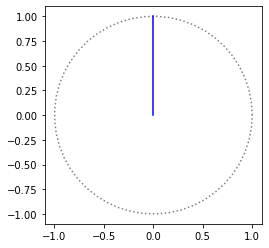

In [20]:
t = np.linspace(0, 2*np.pi, 50)
plt.plot(np.cos(t), np.sin(t), c='gray', ls='dotted')
plt.plot([0,0],[0,1], c='blue')
plt.axis('square')